# Telco Customer Churn Dataset Overview

This dataset contains information about customers of a telecommunications company, with the goal of predicting whether a customer will churn (i.e., stop using the service).

- **Number of records:** ~7,000 customers
- **Number of features:** 21 (including customer demographics, services subscribed, account information)
- **Key features include:**
  - Customer demographics: Gender, Senior Citizen status, Partner, Dependents
  - Services subscribed: Phone Service, Internet Service, Online Security, Streaming TV, etc.
  - Account information: Contract type, Payment Method, Monthly Charges, Total Charges, Tenure
- **Target variable:** `Churn` — indicates whether the customer has left the company (`Yes` or `No`)

This dataset is widely used to build classification models that predict customer churn and identify factors influencing customer retention.


In [1]:
# import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load the dataset

df = pd.read_csv(r'../data/telco_churn.csv')

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# check the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
# describe dataset
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
# check for null values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
# convert float64 to int64
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [7]:
# Drop all rows that contain any missing values (NaNs) from the DataFrame df.
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

In [8]:
# drop column which is not useful for evaluation
df.drop(['customerID'], axis=1, inplace=True)

In [9]:
# reset index of dataframe
df.reset_index(drop=True, inplace=True)

In [10]:
# Separate categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Print nicely formatted output
print("="*70)
print("Categorical Columns:")
print("-"*70)
for col in categorical_cols:
    print(f"- {col}")
    
print("\n" + "="*70)
print("Numerical Columns:")
print("-"*70)
for col in numerical_cols:
    print(f"- {col}")
print("="*70)


Categorical Columns:
----------------------------------------------------------------------
- gender
- Partner
- Dependents
- PhoneService
- MultipleLines
- InternetService
- OnlineSecurity
- OnlineBackup
- DeviceProtection
- TechSupport
- StreamingTV
- StreamingMovies
- Contract
- PaperlessBilling
- PaymentMethod
- Churn

Numerical Columns:
----------------------------------------------------------------------
- SeniorCitizen
- tenure
- MonthlyCharges
- TotalCharges


In [11]:
for col in categorical_cols:
    print("="*60)
    print(f"Column: {col}")
    print("-"*60)
    print("Unique Values:")
    print(df[col].unique())
    print("\nValue Counts:")
    print(df[col].value_counts())
    print("="*60 + "\n")

Column: gender
------------------------------------------------------------
Unique Values:
['Female' 'Male']

Value Counts:
gender
Male      3555
Female    3488
Name: count, dtype: int64

Column: Partner
------------------------------------------------------------
Unique Values:
['Yes' 'No']

Value Counts:
Partner
No     3641
Yes    3402
Name: count, dtype: int64

Column: Dependents
------------------------------------------------------------
Unique Values:
['No' 'Yes']

Value Counts:
Dependents
No     4933
Yes    2110
Name: count, dtype: int64

Column: PhoneService
------------------------------------------------------------
Unique Values:
['No' 'Yes']

Value Counts:
PhoneService
Yes    6361
No      682
Name: count, dtype: int64

Column: MultipleLines
------------------------------------------------------------
Unique Values:
['No phone service' 'No' 'Yes']

Value Counts:
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

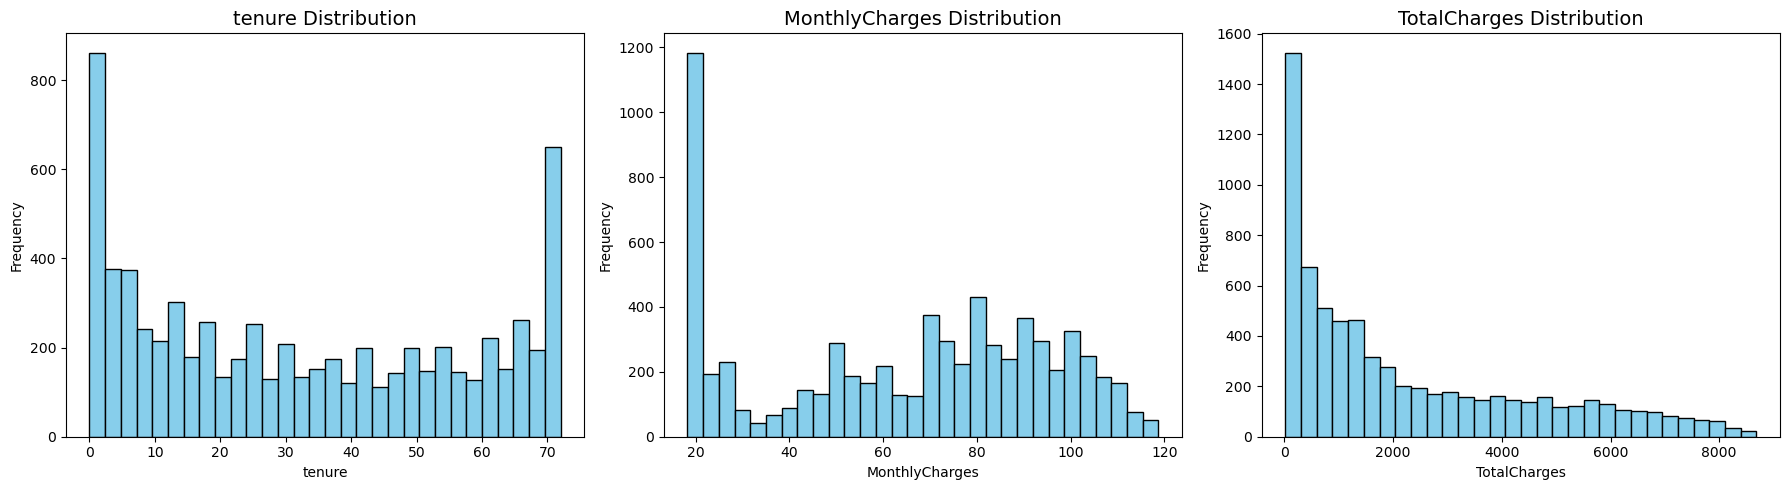

In [12]:
# visulizaing data distribution using histogram plot.

# Only the 3 continuous numerical columns
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Set up the figure and axes with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, col in enumerate(numerical_cols):
    axes[i].hist(df[col], bins=30, color='skyblue', edgecolor='black')
    axes[i].set_title(f'{col} Distribution', fontsize=14)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

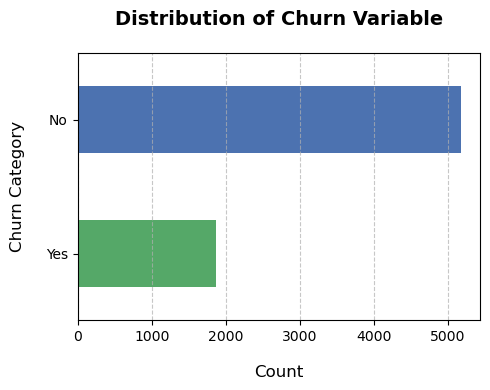

In [13]:
# Plot horizontal bar chart for Churn value counts
ax = df['Churn'].value_counts().plot(kind='barh', figsize=(5, 4), color=['#4c72b0', '#55a868'])

# Set labels and title with padding for better spacing
ax.set_xlabel("Count", labelpad=15, fontsize=12)
ax.set_ylabel("Churn Category", labelpad=15, fontsize=12)
ax.set_title("Distribution of Churn Variable", fontsize=14, weight='bold', pad=20)

# Add grid lines for easier reading
ax.grid(axis='x', linestyle='--', alpha=0.7)

# Invert y-axis for better order (optional)
ax.invert_yaxis()

plt.tight_layout()
plt.show()


In [14]:
# check percentage of churn

100*df['Churn'].value_counts()/len(df['Churn'])

Churn
No     73.463013
Yes    26.536987
Name: count, dtype: float64

In [15]:
# counts
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

### `The dataset is imbalanced, with approximately 73% "No" (non-churners) and 27% "Yes" (churners).`

### `This imbalance may affect model performance, as many algorithms assume balanced classes.`

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [17]:
# Replace 'No internet service' and 'No phone service' with 'No' in categorical cols
replace_cols = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup',
                    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for col in replace_cols:
    df[col] = df[col].replace({'No internet service': 'No', 'No phone service': 'No'})

In [18]:
# Step 4: Encode Categorical Features
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn'] # the columns which have only yes,no
for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

In [19]:
# One-hot encoding for multi-category columns
multi_cols = ['gender', 'InternetService', 'Contract', 'PaymentMethod', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
                  'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
df = pd.get_dummies(df, columns=multi_cols, drop_first=True)

In [20]:
df

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_Male,...,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,MultipleLines_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
0,0,1,0,1,0,1,29.85,29.85,0,False,...,False,True,False,False,False,True,False,False,False,False
1,0,0,0,34,1,0,56.95,1889.50,0,True,...,False,False,True,False,True,False,True,False,False,False
2,0,0,0,2,1,1,53.85,108.15,1,True,...,False,False,True,False,True,True,False,False,False,False
3,0,0,0,45,0,0,42.30,1840.75,0,True,...,False,False,False,False,True,False,True,True,False,False
4,0,0,0,2,1,1,70.70,151.65,1,False,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,1,1,84.80,1990.50,0,True,...,False,False,True,True,True,False,True,True,True,True
7039,0,1,1,72,1,1,103.20,7362.90,0,False,...,True,False,False,True,False,True,True,False,True,True
7040,0,1,1,11,0,1,29.60,346.45,0,False,...,False,True,False,False,True,False,False,False,False,False
7041,1,1,0,4,1,1,74.40,306.60,1,True,...,False,False,True,True,False,False,False,False,False,False


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   Partner                                7043 non-null   int64  
 2   Dependents                             7043 non-null   int64  
 3   tenure                                 7043 non-null   int64  
 4   PhoneService                           7043 non-null   int64  
 5   PaperlessBilling                       7043 non-null   int64  
 6   MonthlyCharges                         7043 non-null   float64
 7   TotalCharges                           7043 non-null   float64
 8   Churn                                  7043 non-null   int64  
 9   gender_Male                            7043 non-null   bool   
 10  InternetService_Fiber optic            7043 non-null   bool   
 11  Inte

In [22]:
# to convert bool dtype to (0/1) (optional)
df = df.astype({col: int for col in df.select_dtypes(include='bool').columns})

In [23]:
df

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_Male,...,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,MultipleLines_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
0,0,1,0,1,0,1,29.85,29.85,0,0,...,0,1,0,0,0,1,0,0,0,0
1,0,0,0,34,1,0,56.95,1889.50,0,1,...,0,0,1,0,1,0,1,0,0,0
2,0,0,0,2,1,1,53.85,108.15,1,1,...,0,0,1,0,1,1,0,0,0,0
3,0,0,0,45,0,0,42.30,1840.75,0,1,...,0,0,0,0,1,0,1,1,0,0
4,0,0,0,2,1,1,70.70,151.65,1,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,1,1,84.80,1990.50,0,1,...,0,0,1,1,1,0,1,1,1,1
7039,0,1,1,72,1,1,103.20,7362.90,0,0,...,1,0,0,1,0,1,1,0,1,1
7040,0,1,1,11,0,1,29.60,346.45,0,0,...,0,1,0,0,1,0,0,0,0,0
7041,1,1,0,4,1,1,74.40,306.60,1,1,...,0,0,1,1,0,0,0,0,0,0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   Partner                                7043 non-null   int64  
 2   Dependents                             7043 non-null   int64  
 3   tenure                                 7043 non-null   int64  
 4   PhoneService                           7043 non-null   int64  
 5   PaperlessBilling                       7043 non-null   int64  
 6   MonthlyCharges                         7043 non-null   float64
 7   TotalCharges                           7043 non-null   float64
 8   Churn                                  7043 non-null   int64  
 9   gender_Male                            7043 non-null   int32  
 10  InternetService_Fiber optic            7043 non-null   int32  
 11  Inte

## `Now Data is Cleaned`

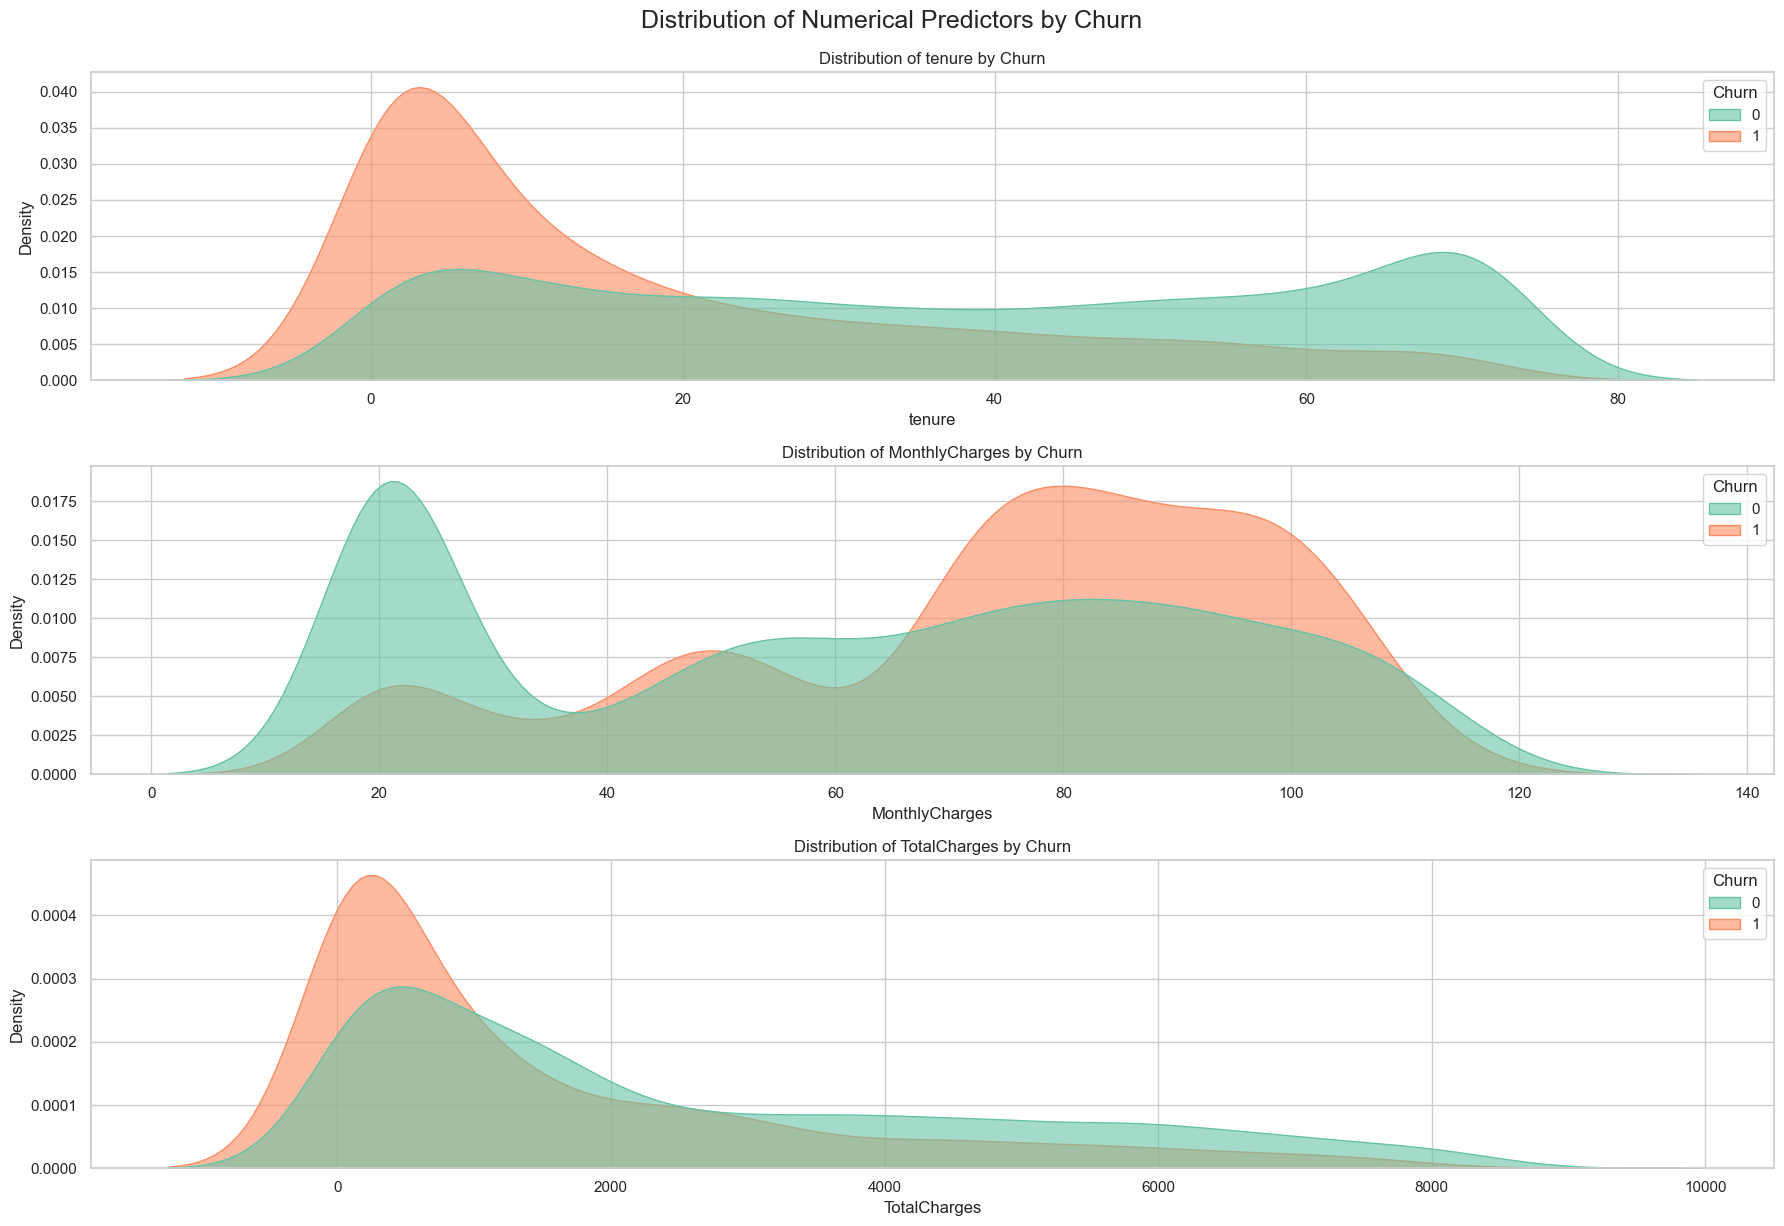

In [25]:
# Set theme for consistency
sns.set_theme(style="whitegrid")

# KDE plots for numerical columns
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
plt.figure(figsize=(18, len(numerical_cols) * 4))
for idx, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols), 1, idx)
    sns.kdeplot(data=df, x=col, hue='Churn', fill=True, common_norm=False, palette='Set2', alpha=0.6)
    plt.title(f'Distribution of {col} by Churn')
plt.tight_layout()
plt.suptitle("Distribution of Numerical Predictors by Churn", fontsize=18, y=1.02)
plt.show()

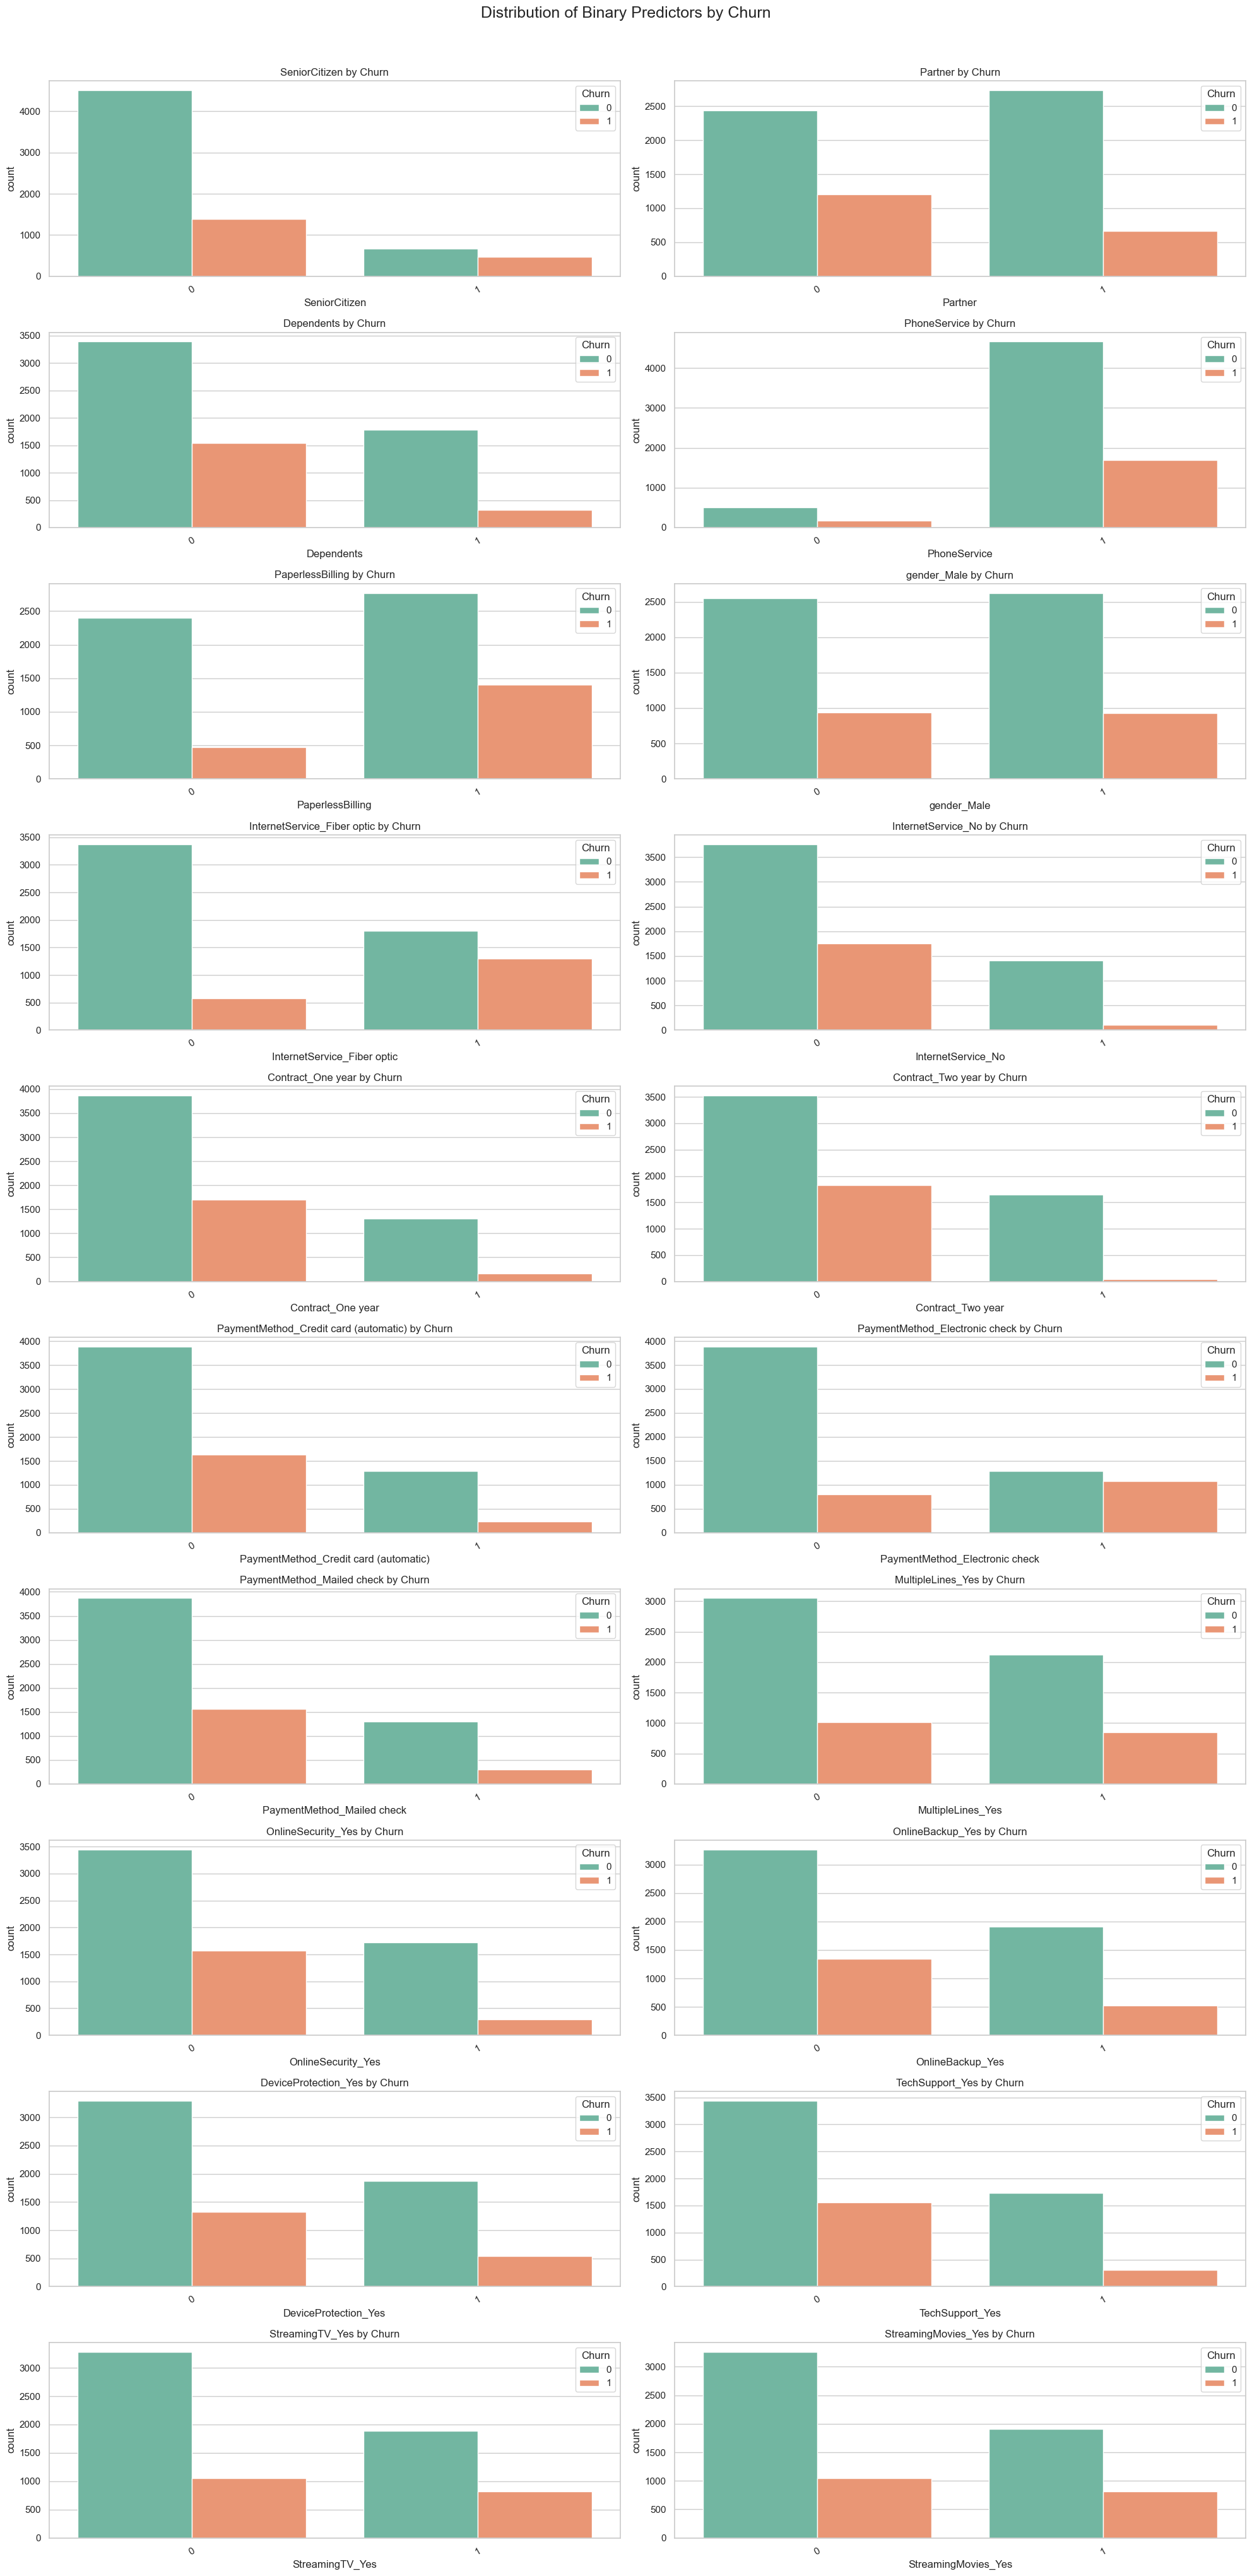

In [26]:
# Countplots for binary/categorical dummy variables
binary_cols = df.drop(columns=numerical_cols + ['Churn']).columns
plt.figure(figsize=(20, len(binary_cols) * 2))
for idx, col in enumerate(binary_cols, 1):
    plt.subplot((len(binary_cols) + 1) // 2, 2, idx)
    sns.countplot(data=df, x=col, hue='Churn', palette='Set2')
    plt.title(f'{col} by Churn')
    plt.xticks(rotation=30)
plt.tight_layout()
plt.suptitle("Distribution of Binary Predictors by Churn", fontsize=18, y=1.02)
plt.show()

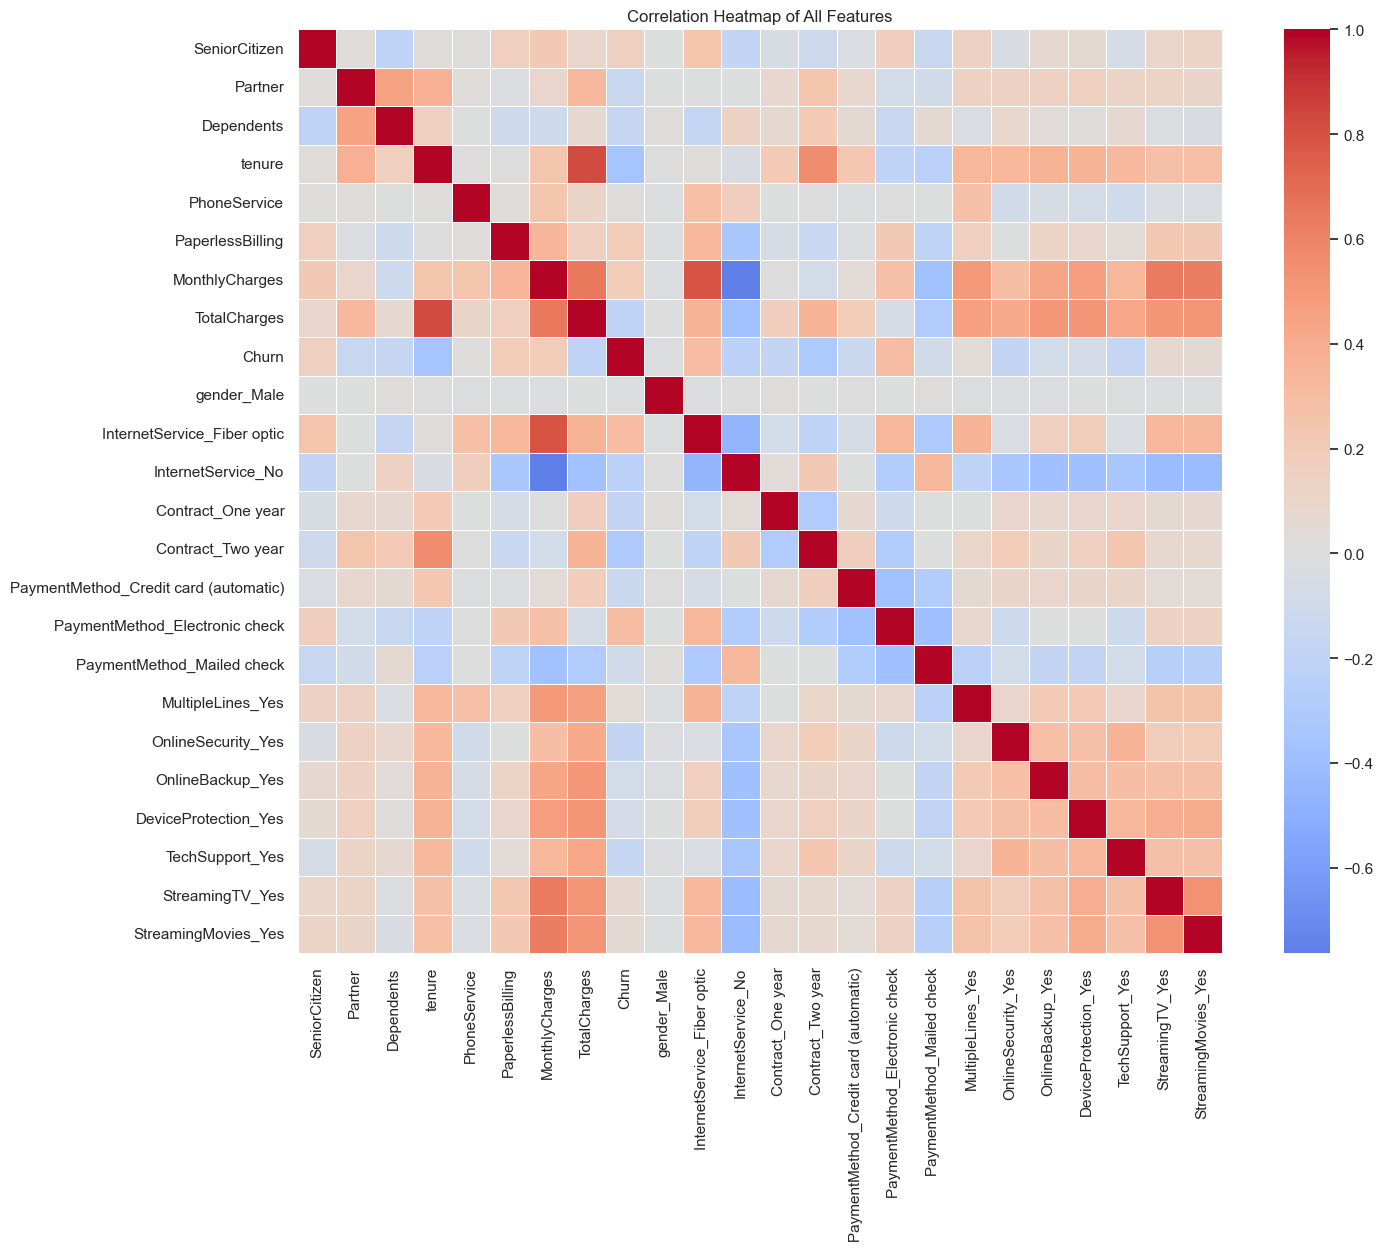

In [27]:
# Correlation heatmap
plt.figure(figsize=(16, 12))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', center=0, annot=False, fmt='.2f', square=True, linewidths=.5)
plt.title("Correlation Heatmap of All Features")
plt.show()

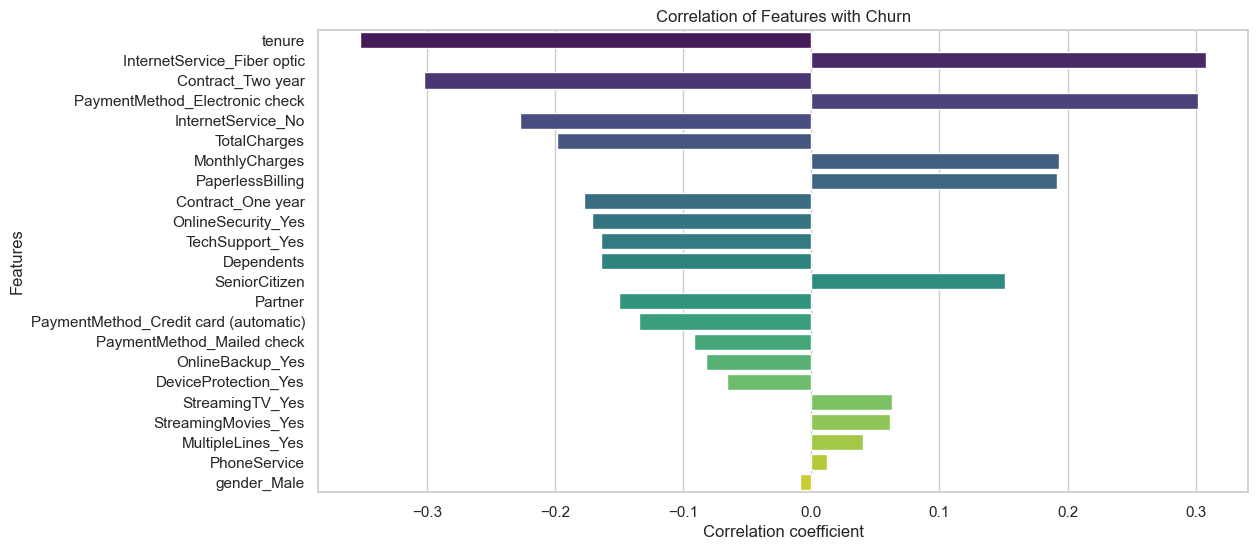

In [28]:
# Churn correlation with all features
plt.figure(figsize=(12, 6))
corr_target = corr['Churn'].drop('Churn').sort_values(key=abs, ascending=False)
sns.barplot(x=corr_target.values, y=corr_target.index, palette='viridis')
plt.title("Correlation of Features with Churn")
plt.xlabel("Correlation coefficient")
plt.ylabel("Features")
plt.show()

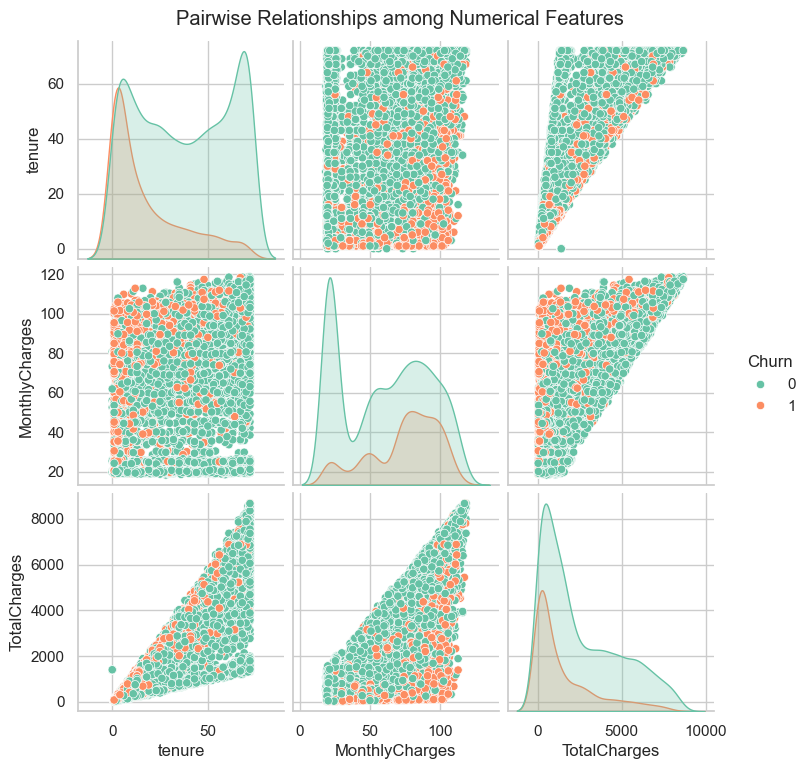

In [29]:
# Pairplot for numerical columns (optional if dataset size permits)
sns.pairplot(df[numerical_cols + ['Churn']], hue='Churn', palette='Set2')
plt.suptitle("Pairwise Relationships among Numerical Features", y=1.02)
plt.show()

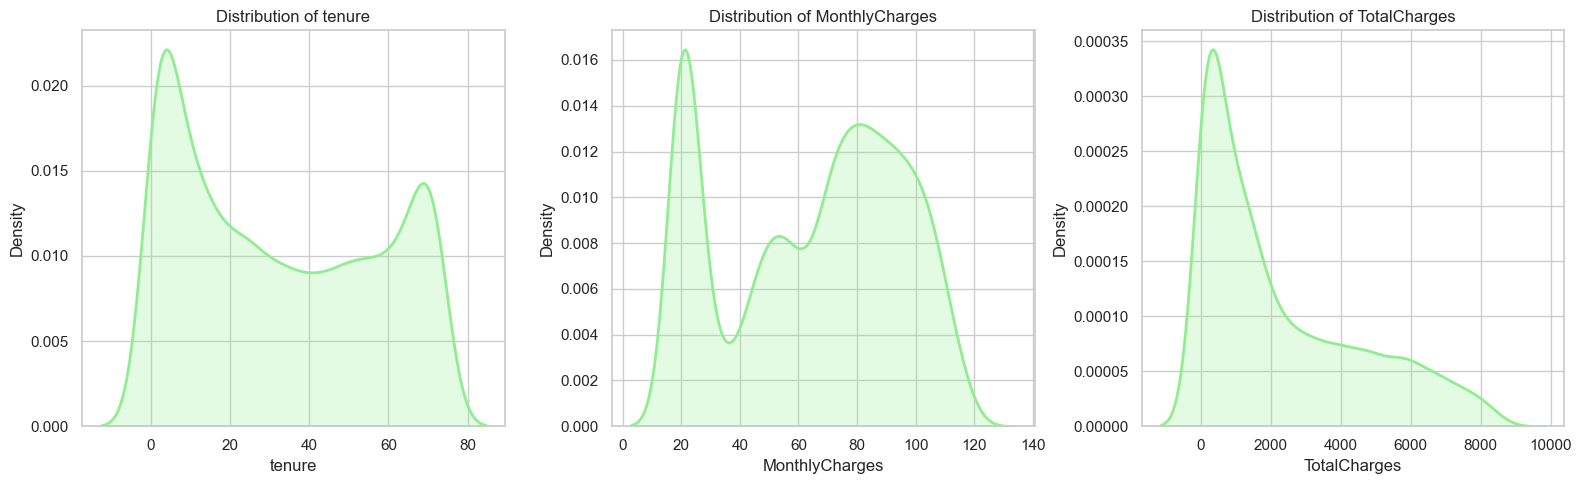

In [30]:
# Numerical columns in Telco dataset
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Function to plot distribution
def plot_telco_distribution(data, cols):
    plt.figure(figsize=(16, 5))
    for i, col in enumerate(cols):
        plt.subplot(1, 3, i + 1)
        sns.kdeplot(data[col], fill=True, color='lightgreen', linewidth=2)
        plt.title(f'Distribution of {col}', fontsize=12)
        plt.xlabel(col)
        plt.ylabel('Density')
        plt.grid(True)
    plt.tight_layout()
    plt.show()

# Call the function on your Telco DataFrame
plot_telco_distribution(df, numerical_cols)

### `All numerical features in the Telco dataset exhibit approximately normal distributions, making StandardScaler an appropriate choice for feature scaling.`

In [31]:
#Feature and Target Split
x = df.drop('Churn', axis=1)
y = df['Churn']

In [32]:
# train test split
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42, stratify=y)

In [33]:
# Apply SMOTE on training data only
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

print(f"Before SMOTE, counts of label '1': {sum(y_train==1)}")
print(f"After SMOTE, counts of label '1': {sum(y_train_smote==1)}")

Before SMOTE, counts of label '1': 1495
After SMOTE, counts of label '1': 4139


In [34]:
# Feautre Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_smote)
x_test_scaled = scaler.transform(x_test)

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
import joblib

#### `Parameters for Hyper Parameter Tuning ->`

In [36]:
# Models with param grids
models = {
    'LogisticRegression': {
        'model': LogisticRegression(max_iter=1000),
        'params': {
            'C': [0.01, 0.1, 1, 10, 100],
            'solver': ['lbfgs', 'liblinear'],
            'penalty': ['l2'],
        }
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7, 9, 11],
            'weights': ['uniform', 'distance'],
            'p': [1, 2]
        }
    },
    'DecisionTree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini', 'entropy', 'log_loss'],
            'splitter': ['best', 'random'],
            'max_depth': [3, 5, 7, 10, 15, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'max_features': ['auto', 'sqrt', 'log2', None],
        }
    },
    'RandomForest': {
        'model': RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 42,max_depth=6, min_samples_leaf=8),
        'params': None  # No tuning here
        # 'params': {
        #     'n_estimators': [100, 200],
        #     'max_depth': [10, 20, None],
        #     'min_samples_split': [2, 5, 10],
        #     'min_samples_leaf': [1, 2, 4],
        #     'max_features': ['auto', 'sqrt', 'log2']
        # }
    },
    'AdaBoost': {
        'model': AdaBoostClassifier(),
        'params': {
            'n_estimators': [50, 100, 150],
            'learning_rate': [0.01, 0.1, 0.5, 1],
            'algorithm': ['SAMME', 'SAMME.R']
        }
    },
    'GradientBoosting': {
        'model': GradientBoostingClassifier(),
        'params': {
            'n_estimators': [100, 200],
            'learning_rate': [0.01, 0.05, 0.1]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
        'params': {
            'n_estimators': [100, 200],
            'learning_rate': [0.01, 0.05, 0.1]
        }
    }
}

In [37]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

best_models = {}
best_score = 0
best_model_name = None

# Dictionaries to hold accuracy values for plotting
train_accuracies = {}
test_accuracies = {}
summary_rows = []

for model_name, mp in models.items():
    print(f"\n{'='*40}\nTraining {model_name}...")
    
    if mp['params']:  # Hyperparameter tuning with GridSearchCV
        clf = GridSearchCV(mp['model'], mp['params'], cv=5, scoring='accuracy')
        clf.fit(x_train_scaled, y_train_smote)
        best_estimator = clf.best_estimator_
        best_params = clf.best_params_
        print(f"Best params: {best_params}")
        print(f"Best CV accuracy: {clf.best_score_:.4f}")
    else:
        # No tuning - fit directly
        mp['model'].fit(x_train_scaled, y_train_smote)
        best_estimator = mp['model']
        best_params = "No tuning"
        print("No tuning applied.")

    # Train accuracy
    train_pred = best_estimator.predict(x_train_scaled)
    train_acc = accuracy_score(y_train_smote, train_pred)
    train_accuracies[model_name] = train_acc

    # Test accuracy
    y_pred = best_estimator.predict(x_test_scaled)
    test_acc = accuracy_score(y_test, y_pred)
    test_accuracies[model_name] = test_acc

    print(f"Train Accuracy: {train_acc:.4f}")
    print(f"Test Accuracy: {test_acc:.4f}")
    print(classification_report(y_test, y_pred))

    # Save summary row
    summary_rows.append({
        "Model": model_name,
        "Train Accuracy": round(train_acc, 4),
        "Test Accuracy": round(test_acc, 4),
        "Best Params": best_params
    })

    # Track best model
    if test_acc > best_score:
        best_score = test_acc
        best_model_name = model_name
        best_models[model_name] = best_estimator

# Display summary table
summary_df = pd.DataFrame(summary_rows)
print("\n=== Model Summary ===")
display(summary_df)

print(f"\n Best Model: {best_model_name} with Test Accuracy: {best_score:.4f}")


Training LogisticRegression...
Best params: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Best CV accuracy: 0.8119
Train Accuracy: 0.8303
Test Accuracy: 0.7814
              precision    recall  f1-score   support

           0       0.87      0.82      0.85      1035
           1       0.58      0.66      0.62       374

    accuracy                           0.78      1409
   macro avg       0.72      0.74      0.73      1409
weighted avg       0.79      0.78      0.79      1409


Training KNN...
Best params: {'n_neighbors': 11, 'p': 1, 'weights': 'uniform'}
Best CV accuracy: 0.8136
Train Accuracy: 0.8434
Test Accuracy: 0.7374
              precision    recall  f1-score   support

           0       0.88      0.74      0.81      1035
           1       0.50      0.73      0.60       374

    accuracy                           0.74      1409
   macro avg       0.69      0.73      0.70      1409
weighted avg       0.78      0.74      0.75      1409


Training DecisionTree...
Best param

,Model,Train Accuracy,Test Accuracy,Best Params
0,LogisticRegression,0.8303,0.7814,"{'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}"
1,KNN,0.8434,0.7374,"{'n_neighbors': 11, 'p': 1, 'weights': 'uniform'}"
2,DecisionTree,0.8703,0.7346,"{'criterion': 'gini', 'max_depth': 10, 'max_fe..."
3,RandomForest,0.8299,0.7544,No tuning
4,AdaBoost,0.8346,0.7537,"{'algorithm': 'SAMME', 'learning_rate': 1, 'n_..."
5,GradientBoosting,0.8653,0.7679,"{'learning_rate': 0.1, 'n_estimators': 200}"
6,XGBoost,0.9321,0.7800,"{'learning_rate': 0.1, 'n_estimators': 200}"



 Best Model: LogisticRegression with Test Accuracy: 0.7814



Confusion Matrix for LogisticRegression:



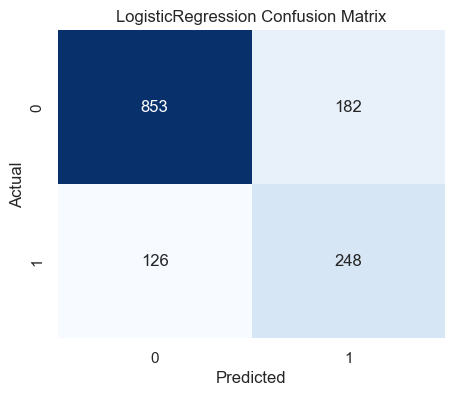

In [38]:
from sklearn.metrics import confusion_matrix
for model_name, model_obj in best_models.items():
    print(f"\nConfusion Matrix for {model_name}:\n")
    
    # Predict on test set
    y_pred = model_obj.predict(x_test_scaled)
    
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot heatmap
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

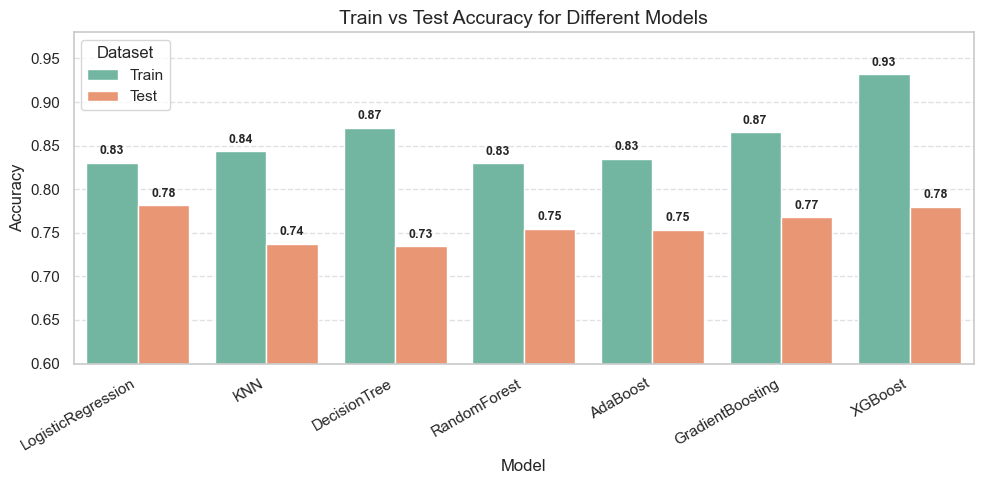

In [39]:
# Prepare data for seaborn barplot
df_plot = pd.DataFrame({
    'Model': list(train_accuracies.keys()) * 2,
    'Accuracy': list(train_accuracies.values()) + list(test_accuracies.values()),
    'Dataset': ['Train'] * len(train_accuracies) + ['Test'] * len(test_accuracies)
})

plt.figure(figsize=(10, 5))  # Reduced size for better notebook fit
barplot = sns.barplot(data=df_plot, x='Model', y='Accuracy', hue='Dataset', palette='Set2')

# Add value labels on top of bars
for p in barplot.patches:
    height = p.get_height()
    # Adjust label height to not overlap with the title
    offset = 4 if height < 0.96 else 1
    barplot.annotate(f'{height:.2f}',
                     (p.get_x() + p.get_width() / 2., height),
                     ha='center', va='bottom',
                     fontsize=9, fontweight='bold',
                     xytext=(0, offset), textcoords='offset points')

plt.ylim(0.6, 0.98)  # Limiting max y to avoid title collision
plt.title('Train vs Test Accuracy for Different Models', fontsize=14)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.xticks(rotation=30, ha='right')
plt.legend(title='Dataset')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [40]:
# Save the best model
joblib.dump(best_models[best_model_name], 'model.pkl')
print("Best model saved as 'model.pkl'")

Best model saved as 'model.pkl'


### Final Conclusion

In this project, several machine learning models were trained and evaluated to predict customer churn. The performance metrics are summarized below:

| Model             | Train Accuracy | Test Accuracy | Best Hyperparameters                         |
|-------------------|----------------|---------------|----------------------------------------------|
| Logistic Regression| 0.8303         | 0.7814        | {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}|
| K-Nearest Neighbors| 0.8434         | 0.7374        | {'n_neighbors': 11, 'p': 1, 'weights': 'uniform'}|
| Decision Tree      | 0.8703         | 0.7346        | {'criterion': 'gini', 'max_depth': 10, ...} |
| Random Forest      | 0.8299         | 0.7544        | No tuning                                    |
| AdaBoost          | 0.8346         | 0.7537        | {'algorithm': 'SAMME', 'learning_rate': 1, ...}|
| Gradient Boosting  | 0.8653         | 0.7679        | {'learning_rate': 0.1, 'n_estimators': 200} |
| XGBoost           | 0.9321         | 0.7800        | {'learning_rate': 0.1, 'n_estimators': 200} |

Among these models, **Logistic Regression** achieved the best balance between training and test accuracy, with a test accuracy of **78.14%**. Although XGBoost showed higher training accuracy (93.21%) and comparable test accuracy (78.00%), it may be more prone to overfitting given the large gap between training and test performance.

Therefore, Logistic Regression was selected as the final model due to its good generalization, simplicity, and interpretability. This model can effectively predict customer churn and can be further integrated into a web application for practical use.

Future improvements could include exploring more complex ensembles, feature engineering, and hyperparameter tuning to further boost performance.